In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
x_train = catalog.load('uci_wine_quality_1.x_train')
y_train = catalog.load('uci_wine_quality_1.y_train')

x_test = catalog.load('uci_wine_quality_1.x_test')
y_test = catalog.load('uci_wine_quality_1.y_test')
model = catalog.load('uci_wine_quality_1.model')

2022-01-10 09:11:08,343 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.x_train` (UCIDataSet)...
2022-01-10 09:11:08,365 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.y_train` (UCIDataSet)...
2022-01-10 09:11:08,384 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.x_test` (UCIDataSet)...
2022-01-10 09:11:08,400 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.y_test` (UCIDataSet)...
2022-01-10 09:11:08,419 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.model` (TFBoostDataSet)...


In [3]:
model_tree = catboost.CatBoostRegressor(loss_function='RMSEWithUncertainty')
model_tree.fit(x_train, y_train, verbose=False)

In [4]:
y_test_catboost = model_tree.predict(x_test)
y_test_catboost_treeflow = model.tree_model.predict(x_test)

y_test_samples = model.sample(x_test, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

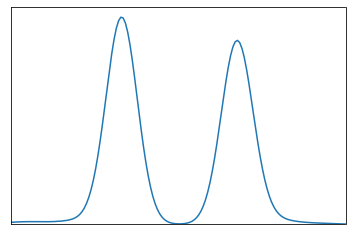

In [30]:
# x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
# plt.plot(x, stats.norm.pdf(x), label='norm pdf')
sns.kdeplot(y_test_samples[5, :])
plt.xlim([4, 7])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()

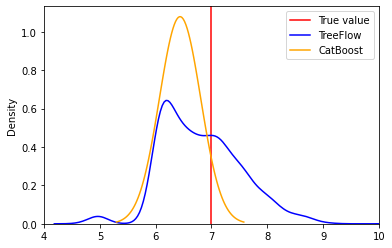

In [6]:
i = 3

plt.axvline(x=y_test.values[i, :], color='r', label='True value')

sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

x = np.linspace(
    stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    100
)
plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

plt.xlim([4, 10])
plt.legend()
plt.savefig('wine_multimodal_2.pdf')

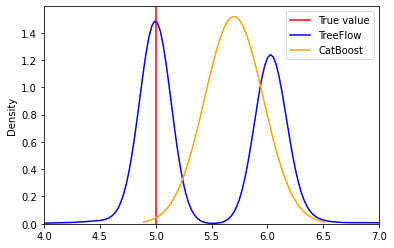

In [7]:
i = 5

plt.axvline(x=y_test.values[i, :], color='r', label='True value')

sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

x = np.linspace(
    stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
    100
)
plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

plt.xlim([4, 7])
plt.legend()
plt.savefig('wine_multimodal_1.pdf')